1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

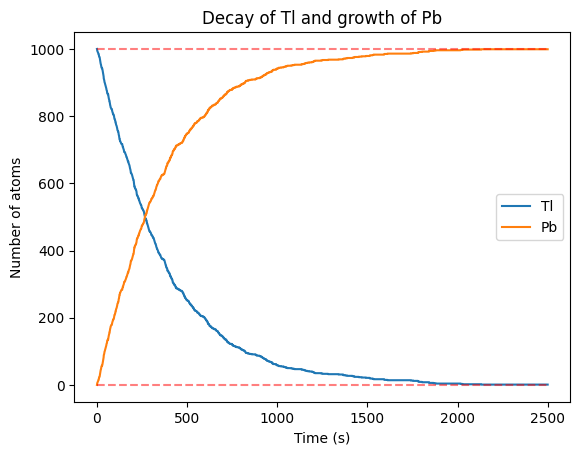

'\nThis script simulates the decay of Thallium atoms into Lead atoms over time. \nIt uses a binomial distribution to determine the number of atoms that decay at each time step, \nbased on the decay probability.\n'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(9725)  # Set random seed for reproducibility
# Constants
half_life = 3.052 * 60  # Convert minutes to seconds
tau = half_life / np.log(2)
time_steps = 2500  # Total simulation time in seconds
Tl_in = 1000  # Initial number of Tl atoms

# Arrays to hold the number of atoms
Tl = np.zeros(time_steps)
Pb = np.zeros(time_steps)
Tl[0] = Tl_in

# Main simulation loop
for t in range(1, time_steps):
    # Calculate the probability of decay for each atom
    p = 1 - 2**(-1/tau)
    
    # Determine how many atoms decay
    decays = np.random.binomial(Tl[t-1], p)
    
    # Update the number of atoms
    Tl[t] = Tl[t-1] - decays
    Pb[t] = Pb[t-1] + decays

# Plot the results
plt.plot(Tl, label='Tl')
plt.plot(Pb, label='Pb')
plt.hlines(Tl_in, 0 , time_steps, linestyles='dashed', color='red', alpha=0.5)
plt.hlines(0, 0, time_steps, linestyles='dashed', color='red', alpha=0.5)
plt.title('Decay of Tl and growth of Pb')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.show()


# '''
# This script simulates the decay of Thallium atoms into Lead atoms over time. 
# It uses a binomial distribution to determine the number of atoms that decay at each time step, 
# based on the decay probability.
# '''

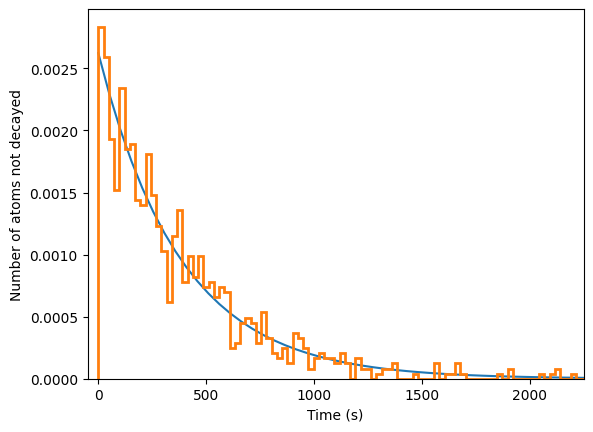

In [4]:
# Constants
half_life = 3.052 * 60  # Convert minutes to seconds
tau = half_life / np.log(2)
num_atoms = 1000  # Initial number of Tl atoms
times = np.linspace(0, 2500)

# Inverse transform function
def tl_decay(t):
    return 2**(-t/tau)*np.log(2)/tau

def ic_decay(t):
    return -tau*np.log2(1-t)

plt.plot(times, tl_decay(times), label='Tl decay')

t_unif = np.random.uniform(size=num_atoms)
plt.hist(ic_decay(t_unif), histtype='step', bins=100, density=True, linewidth=2)
plt.xlim(-50, 2250)
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms not decayed')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [28]:
import scipy.constants as spc
import pandas as pd
a0 = spc.physical_constants['Bohr radius'][0]
sigma = a0/100
E = 7.7 * 10**6 
E_j = E * spc.e
Z = 79
e = spc.e
e0 = spc.epsilon_0
num_particles = 1_000_000
angle = np.pi/2

def scattering(b, E=E, eps0=e0, e=e, Z=Z):
    return Z*e/(2*np.pi*eps0*E*b)

z = np.random.random(num_particles)
theta = 2*np.pi*np.random.random(num_particles)
r = np.sqrt(-2*sigma**2*np.log(1-z))

data = pd.DataFrame({'x':r*np.cos(theta), 'y':r*np.sin(theta)})

data['b'] = np.sqrt(data['x']**2+data['y']**2)
ruth = scattering(data['b']).values

theta = 2*np.arctan(ruth)

print(np.count_nonzero(theta[theta > angle])/num_particles)


0.001583


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [41]:
# To compute the integral of `func1(x)` between 0 and 2 using the hit/miss Monte Carlo method, we can follow these steps:

# 1. Define the number of random points `n` to be used for the estimation.
# 2. Generate `n` random points `x` in the interval [0, 2].
# 3. Generate `n` random points `y` in the interval [0, 1] (assuming the function `func1(x)` is bounded between 0 and 1).
# 4. Compute `func1(x)` for each randomly generated `x`.
# 5. Count the number of points `y` that are below `func1(x)`.
# 6. The integral is approximately equal to the count divided by `n`, times the area of the bounding box (2 in this case).
# 7. The error of the estimate can be computed as the square root of the variance divided by `n`.

import warnings
# Disable RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

num_iter = 1_000_000

def func1(x):
    return np.sin(1/(x*(2-x)))**2

def monte_carlo_integration(func, a, b, n=num_iter):
    x = np.random.uniform(a, b, n)
    y = np.random.uniform(0, 1, n) # assuming func(x) is bounded between 0 and 1
    fx = func(x)
    hits = np.sum(y < fx)
    integral_hit = (b - a) * hits / n
    error_hit = (b - a) * np.sqrt((fx**2).mean() - (fx.mean())**2) / np.sqrt(n)
    return integral_hit, error_hit

integral_hit, error_hit = monte_carlo_integration(func1, 0, 2)
print(f"Integral: {integral_hit}, Error: {error_hit}")

# plt.plot(np.linspace(0, 2, 100), func1(np.linspace(0, 2, 100)))

Integral: 1.451766, Error: 0.0005265475889405898


In [44]:
def mean_int(func, a, b, n=num_iter):
    x = np.random.uniform(a, b, n)
    f_mean = 1/n * np.sum(func(x))
    integral_mean = (b - a) * f_mean

    error_mean = (b - a) * np.sqrt((func(x)**2).mean() - (func(x).mean())**2) / np.sqrt(n) 
    return integral_mean, error_mean

integral_mean, error_mean = mean_int(func1, 0, 2)
print(f"Integral: {integral_mean}, Error: {error_mean}")



Integral: 1.4504278334593281, Error: 0.0005277932419792039


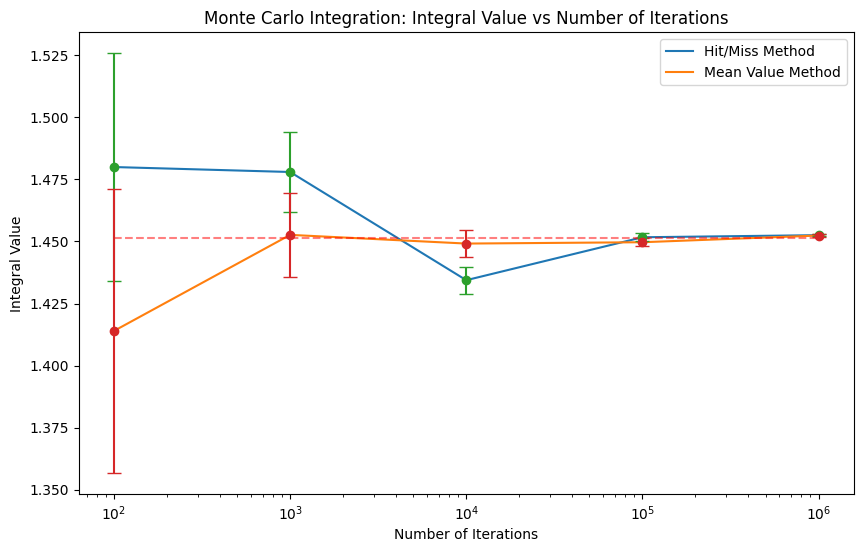

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of iterations
num_iterations = [100, 1000, 10000, 100000, 1000000]

# Initialize lists to store the integral values and errors
integral_hit_values = []
error_hit_values = []
integral_mean_values = []
error_mean_values = []

# Perform the Monte Carlo integration for each number of iterations
for num_iter in num_iterations:
    integral_hit, error_hit = monte_carlo_integration(func1, 0, 2, n=num_iter)
    integral_mean, error_mean = mean_int(func1, 0, 2, n=num_iter)
    
    integral_hit_values.append(integral_hit)
    error_hit_values.append(error_hit)
    integral_mean_values.append(integral_mean)
    error_mean_values.append(error_mean)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(num_iterations, integral_hit_values, label='Hit/Miss Method')
plt.plot(num_iterations, integral_mean_values, label='Mean Value Method')
plt.hlines(1.4514, 100, 1000000, linestyles='dashed', color='red', alpha=0.5)
plt.errorbar(num_iterations, integral_hit_values, yerr=error_hit_values, fmt='o', capsize=5)
plt.errorbar(num_iterations, integral_mean_values, yerr=error_mean_values, fmt='o', capsize=5)
plt.xscale('log')
plt.xlabel('Number of Iterations')
plt.ylabel('Integral Value')
plt.title('Monte Carlo Integration: Integral Value vs Number of Iterations')
plt.legend()
plt.show()


In [40]:
import warnings
# Disable RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

num_iter = 1_000_000

def func1(x):
    return np.sin(1/(x*(2-x)))**2
count = 0
for i in range(0, num_iter):
    x = 2*np.random.random()
    y = np.random.random() # assuming func(x) is bounded between 0 and 1
    fx = func1(x)
    if y<fx: count+=1

I=2*count/num_iter
print(I)

1.451004


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [54]:
def func2(x, y):
    if x**2+y**2 <= 1:
        return 1
    else:
        return 0

n_points = 1_000_000

points = np.random.uniform(-1, 1, (n_points, 2))

count = 0
for i in range(n_points):
    count += func2(points[i, 0], points[i, 1])

I = 4*count/n_points
print(I)

print('relative error:', np.abs(np.pi-I)/np.pi)

3.141644
relative error: 1.634406998886163e-05


In [55]:
dim = 10
Vdim = 2**dim

def func3(x):
    if np.sum([i**2 for i in x])<=1:
        return 1
    else:
        return 0

points_dim = np.random.uniform(-1, 1, (n_points, dim))

count_dim = 0
for i in range(n_points):
    count_dim += func3(points_dim[i, :])

I_dim = Vdim*count_dim/n_points

print(I_dim)
print('relative error:', np.abs((np.pi**5/120)-I_dim)/(np.pi**5/120))

2.522112
relative error: 0.011000092322960677


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$

In [64]:
def func4(x):
    return x**(-0.5)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)


def mean_func(func, weight, a, b, n=num_iter):
    x = np.random.uniform(a, b, n)
    mean = 1/n * np.sum(func(x)/weight(x))
    return mean

def mean_int(weight, a, b, n=num_iter, x=x):
    # x = np.random.uniform(a, b, n)
    f_mean = (b-a)/n * np.sum(weight(x))
    return f_mean

inverse_sampling_int = mean_func(func4, w, 0, 1, n=1_000_000)*mean_int(w, 0, 1, n=1_000_000)
print(inverse_sampling_int)


0.7582165283943331


In [71]:
def importance_sampling_integration(func, weight_func, inv_cdf, a, b, n=1_000_000):
    u = np.random.uniform(a, b, n)
    x = inv_cdf(u)
    fx_over_wx = func(x) / weight_func(x)
    integral = np.mean(fx_over_wx) * mean_int(weight_func, a, b, n=1_000_000)

    return integral

def func(x):
    return x**(-1/2) / (np.exp(x) + 1)

def weight_func(x):
    return 1/np.sqrt(x)

def inv_cdf(u):
    return u**2

def mean_int(weight, a, b, n):
    x = np.random.uniform(a, b, n)
    f_mean = (b-a)/n * np.sum(weight(x))
    return f_mean

integral= importance_sampling_integration(func, weight_func, inv_cdf, 0, 1)
print(f"Integral: {integral}")

Integral: 0.8362330024161136
